# Kernels para svm


![Imgur](https://i.imgur.com/6bH9ZE6.png)

## Kernel Linear


O kernel linear é usado quando os dados são linearmente separáveis. Isso significa que os dados podem ser separados usando uma única linha. É um dos kernels mais comuns a serem usados. É usado principalmente quando há um grande número de atributos em um conjunto de dados. O kernel linear é frequentemente usado para fins de classificação de texto.

Treinar com um kernel linear geralmente é mais rápido, pois só precisamos otimizar o parâmetro de regularização C. Ao treinar com outros kernels, também precisamos otimizar o parâmetro γ. Portanto, realizar uma pesquisa de grade geralmente levará mais tempo.

O kernel linear pode ser visualizado com a figura a seguir.

### Kernel Linear

![Linear Kernel](https://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_thumb.png)

## Kernel polinomial

O kernel polinomial representa a similaridade de vetores (amostras de treinamento) em um espaço de características sobre polinômios das variáveis originais. O kernel polinomial analisa não apenas os recursos fornecidos das amostras de entrada para determinar sua semelhança, mas também as combinações das amostras de entrada.

Para polinômios de grau d, o núcleo do polinômio é definido da seguinte forma:

![Polinomial](https://www.geeksforgeeks.org/wp-content/ql-cache/quicklatex.com-5ff556b17c4ddba95f4dd9e186cde03e_l3.svg)


O kernel polinomial é muito popular no processamento de linguagem natural. O grau mais comum é d = 2 (quadrático), uma vez que graus maiores tendem a se ajustar em problemas de PLN. Pode ser visualizado com os  a seguir.

### Kernel polinomial

![Polynomial Kernel](https://www.researchgate.net/profile/Cheng_Soon_Ong/publication/23442384/figure/fig12/AS:341444054274063@1458418014823/The-effect-of-the-degree-of-a-polynomial-kernel-The-polynomial-kernel-of-degree-1-leads.png)

## Radial Basis Function Kernel (Gaussiano)

O kernel de função de base radial é um kernel de propósito geral. É usado quando não temos conhecimento prévio sobre os dados. O kernel RBF em duas amostras x e y é definido pela seguinte equação:


### Radial Basis Function kernel

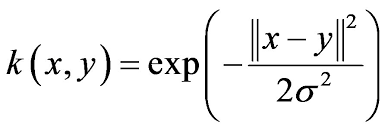

### SVM com kernel rbf

![SVM Classification with rbf kernel](https://www.researchgate.net/profile/Periklis_Gogas/publication/286180566/figure/fig5/AS:304327777374210@1449568804246/An-example-of-an-SVM-classification-using-the-RBF-kernel-The-two-classes-are-separated.png)

# SVM Scikit-Learn 

O Scikit-Learn fornece bibliotecas úteis para implementar o algoritmo Support Vector Machine em um conjunto de dados. Existem muitas bibliotecas que podem nos ajudar a implementar o SVM sem problemas. Só precisamos chamar a biblioteca com parâmetros que se adequem às nossas necessidades.

Primeiro, há um classificador **LinearSVC()**. Como o nome sugere, este classificador usa apenas kernel linear. No classificador LinearSVC(), não passamos o valor do kernel, pois ele é usado apenas para fins de classificação linear.

O Scikit-Learn fornece dois outros classificadores - **SVC()** e **NuSVC()** que são usados ​​para fins de classificação. Esses classificadores são, em sua maioria, semelhantes com alguma diferença nos parâmetros. Passamos os valores de kernel, gama e C junto com outros parâmetros. Por padrão, o parâmetro do kernel usa rbf como seu valor, mas podemos passar valores como poly, linear e sigmoid 

## Importando bibliotecas

In [81]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [9]:
import warnings

warnings.filterwarnings('ignore')

## Importando dataset


In [10]:
!mkdir ~/.kaggle
!cp ~/Downloads/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

mkdir: /Users/brunosette/.kaggle: File exists


In [11]:
!pip install -q kaggle

In [12]:
!kaggle datasets download -d colearninglounge/predicting-pulsar-starintermediate

predicting-pulsar-starintermediate.zip: Skipping, found more recently modified local copy (use --force to force download)


In [13]:
!mkdir -p data/pulsar
!unzip predicting-pulsar-starintermediate.zip  -d data/pulsar

Archive:  predicting-pulsar-starintermediate.zip
replace data/pulsar/pulsar_data_test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [17]:
data = 'data/pulsar/pulsar_data_train.csv'

df = pd.read_csv(data)

In [18]:
df.shape

(12528, 9)

In [19]:
df.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,121.156250,48.372971,0.375485,-0.013165,3.168896,18.399367,7.449874,65.159298,0.0
1,76.968750,36.175557,0.712898,3.388719,2.399666,17.570997,9.414652,102.722975,0.0
2,130.585938,53.229534,0.133408,-0.297242,2.743311,22.362553,8.508364,74.031324,0.0
3,156.398438,48.865942,-0.215989,-0.171294,17.471572,NaN,2.958066,7.197842,0.0
4,84.804688,36.117659,0.825013,3.274125,2.790134,20.618009,8.405008,76.291128,0.0


In [20]:
col_names = df.columns

col_names

Index([' Mean of the integrated profile',
       ' Standard deviation of the integrated profile',
       ' Excess kurtosis of the integrated profile',
       ' Skewness of the integrated profile', ' Mean of the DM-SNR curve',
       ' Standard deviation of the DM-SNR curve',
       ' Excess kurtosis of the DM-SNR curve', ' Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [21]:
df.columns = df.columns.str.strip()

In [22]:
df.columns

Index(['Mean of the integrated profile',
       'Standard deviation of the integrated profile',
       'Excess kurtosis of the integrated profile',
       'Skewness of the integrated profile', 'Mean of the DM-SNR curve',
       'Standard deviation of the DM-SNR curve',
       'Excess kurtosis of the DM-SNR curve', 'Skewness of the DM-SNR curve',
       'target_class'],
      dtype='object')

In [23]:
df.columns = ['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 
              'DM-SNR Mean', 'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class']

In [24]:
df.columns

Index(['IP Mean', 'IP Sd', 'IP Kurtosis', 'IP Skewness', 'DM-SNR Mean',
       'DM-SNR Sd', 'DM-SNR Kurtosis', 'DM-SNR Skewness', 'target_class'],
      dtype='object')

In [25]:
df['target_class'].value_counts()

0.0    11375
1.0     1153
Name: target_class, dtype: int64

In [26]:
df['target_class'].value_counts()/np.float(len(df))

0.0    0.907966
1.0    0.092034
Name: target_class, dtype: float64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12528 entries, 0 to 12527
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   IP Mean          12528 non-null  float64
 1   IP Sd            12528 non-null  float64
 2   IP Kurtosis      10793 non-null  float64
 3   IP Skewness      12528 non-null  float64
 4   DM-SNR Mean      12528 non-null  float64
 5   DM-SNR Sd        11350 non-null  float64
 6   DM-SNR Kurtosis  12528 non-null  float64
 7   DM-SNR Skewness  11903 non-null  float64
 8   target_class     12528 non-null  float64
dtypes: float64(9)
memory usage: 881.0 KB


In [28]:
df.isnull().sum()

IP Mean               0
IP Sd                 0
IP Kurtosis        1735
IP Skewness           0
DM-SNR Mean           0
DM-SNR Sd          1178
DM-SNR Kurtosis       0
DM-SNR Skewness     625
target_class          0
dtype: int64

In [29]:
round(df.describe(),2)

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness,target_class
count,12528.00,12528.00,10793.00,12528.00,12528.00,11350.00,12528.00,11903.00,12528.00
mean,111.04,46.52,0.48,1.78,12.67,26.35,8.33,105.53,0.09
std,25.67,6.80,1.06,6.21,29.61,19.61,4.54,107.40,0.29
min,5.81,24.77,-1.74,-1.79,0.21,7.37,-3.14,-1.98,0.00
25%,100.87,42.36,0.02,-0.19,1.91,14.40,5.80,35.20,0.00
50%,115.18,46.93,0.22,0.20,2.79,18.41,8.45,83.13,0.00
75%,127.11,50.98,0.47,0.93,5.41,28.34,10.73,140.00,0.00
max,189.73,91.81,8.07,68.10,222.42,110.64,34.54,1191.00,1.00


Text(0, 0.5, 'DM-SNR Skewness')

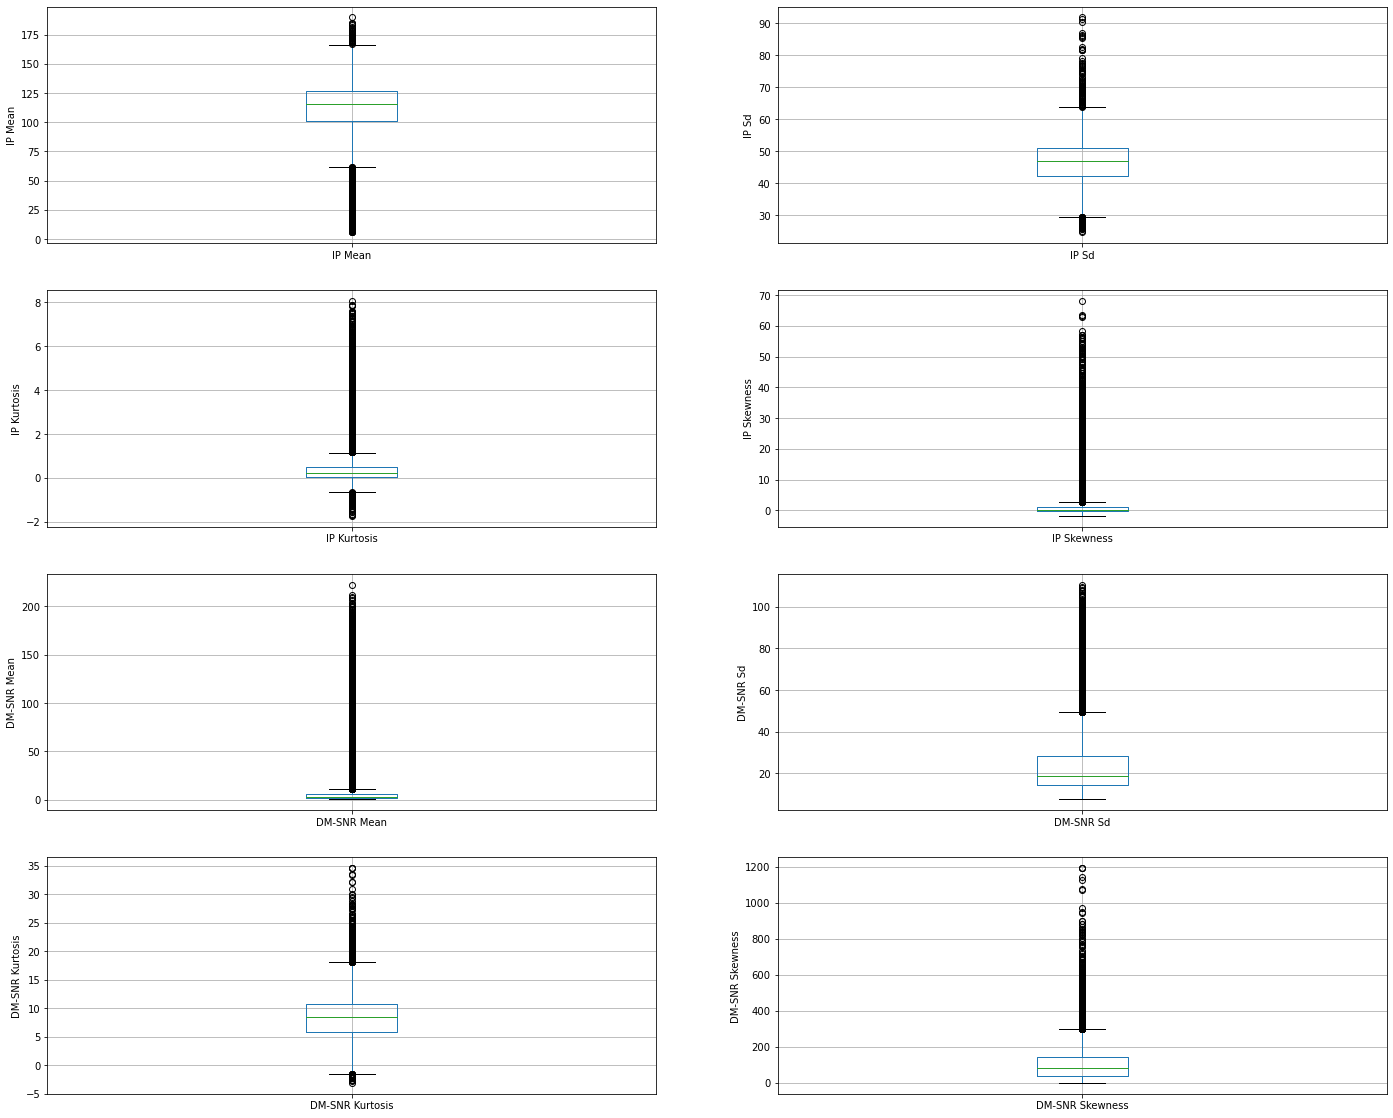

In [30]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df.boxplot(column='IP Mean')
fig.set_title('')
fig.set_ylabel('IP Mean')


plt.subplot(4, 2, 2)
fig = df.boxplot(column='IP Sd')
fig.set_title('')
fig.set_ylabel('IP Sd')


plt.subplot(4, 2, 3)
fig = df.boxplot(column='IP Kurtosis')
fig.set_title('')
fig.set_ylabel('IP Kurtosis')


plt.subplot(4, 2, 4)
fig = df.boxplot(column='IP Skewness')
fig.set_title('')
fig.set_ylabel('IP Skewness')


plt.subplot(4, 2, 5)
fig = df.boxplot(column='DM-SNR Mean')
fig.set_title('')
fig.set_ylabel('DM-SNR Mean')


plt.subplot(4, 2, 6)
fig = df.boxplot(column='DM-SNR Sd')
fig.set_title('')
fig.set_ylabel('DM-SNR Sd')


plt.subplot(4, 2, 7)
fig = df.boxplot(column='DM-SNR Kurtosis')
fig.set_title('')
fig.set_ylabel('DM-SNR Kurtosis')


plt.subplot(4, 2, 8)
fig = df.boxplot(column='DM-SNR Skewness')
fig.set_title('')
fig.set_ylabel('DM-SNR Skewness')

Text(0, 0.5, 'Number of pulsar stars')

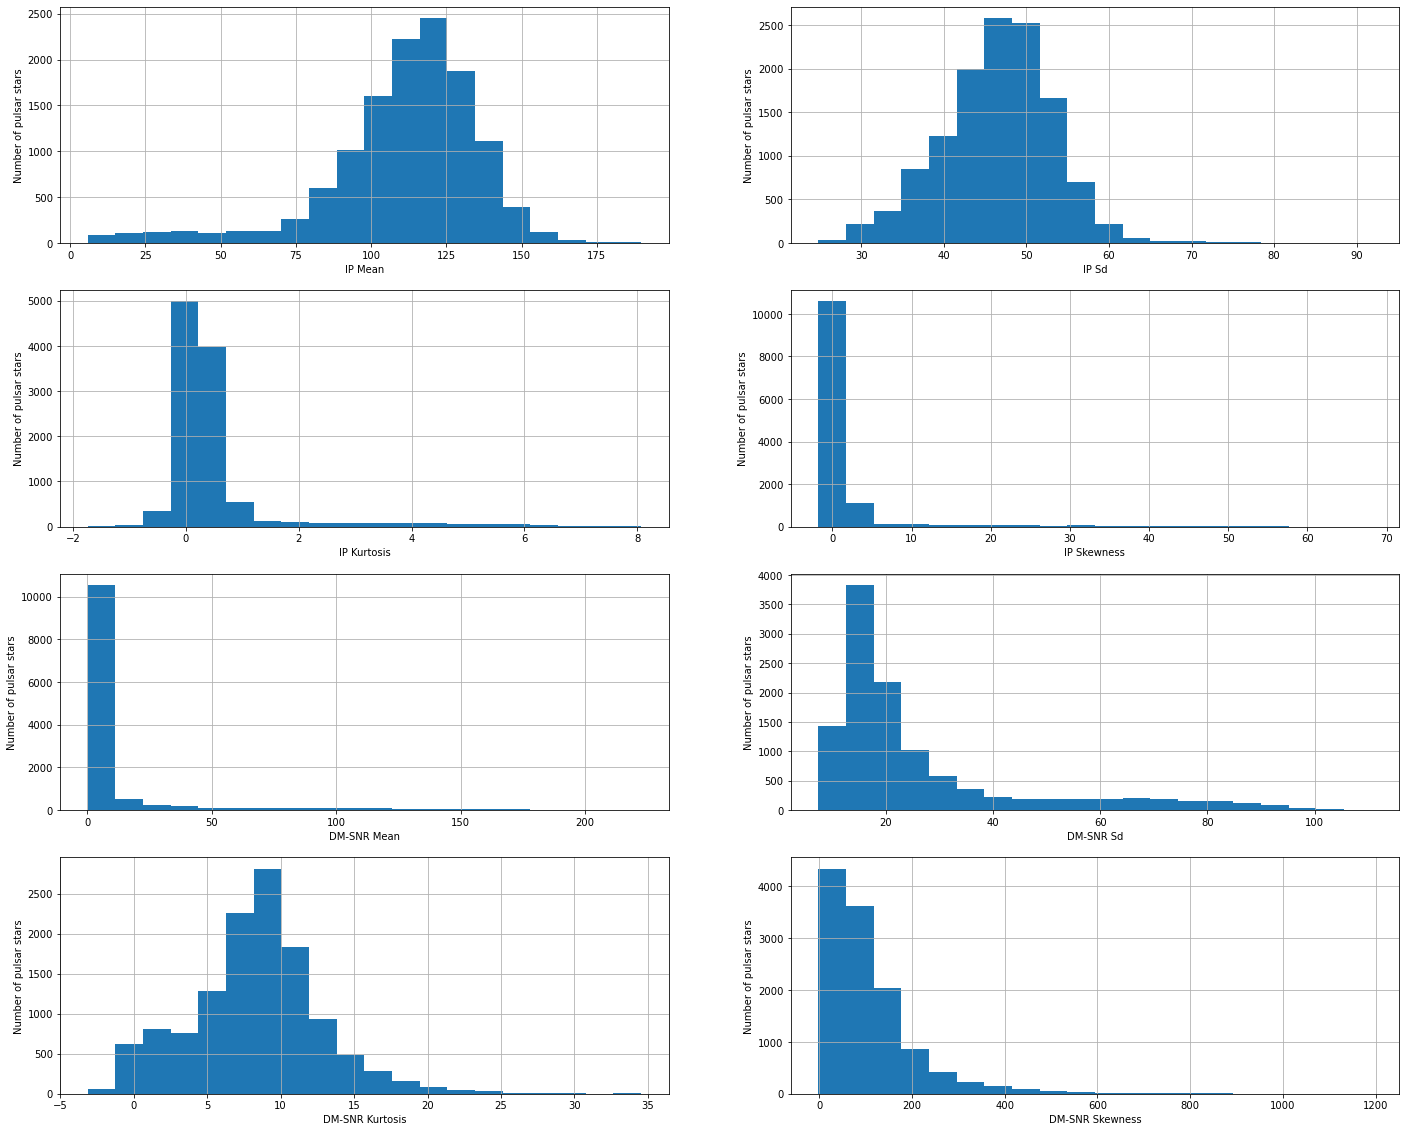

In [31]:
plt.figure(figsize=(24,20))


plt.subplot(4, 2, 1)
fig = df['IP Mean'].hist(bins=20)
fig.set_xlabel('IP Mean')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 2)
fig = df['IP Sd'].hist(bins=20)
fig.set_xlabel('IP Sd')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 3)
fig = df['IP Kurtosis'].hist(bins=20)
fig.set_xlabel('IP Kurtosis')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 4)
fig = df['IP Skewness'].hist(bins=20)
fig.set_xlabel('IP Skewness')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 5)
fig = df['DM-SNR Mean'].hist(bins=20)
fig.set_xlabel('DM-SNR Mean')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 6)
fig = df['DM-SNR Sd'].hist(bins=20)
fig.set_xlabel('DM-SNR Sd')
fig.set_ylabel('Number of pulsar stars')



plt.subplot(4, 2, 7)
fig = df['DM-SNR Kurtosis'].hist(bins=20)
fig.set_xlabel('DM-SNR Kurtosis')
fig.set_ylabel('Number of pulsar stars')


plt.subplot(4, 2, 8)
fig = df['DM-SNR Skewness'].hist(bins=20)
fig.set_xlabel('DM-SNR Skewness')
fig.set_ylabel('Number of pulsar stars')


In [55]:
df.dropna(inplace=True)

In [56]:
X = df.drop(['target_class'], axis=1)

y = df['target_class']

## Split data 

In [57]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [58]:
X_train.shape, X_test.shape

((7418, 8), (1855, 8))

## Feature Scaling 


In [59]:
cols = X_train.columns

In [60]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)

X_test = scaler.transform(X_test)


In [61]:
X_train = pd.DataFrame(X_train, columns=[cols])

In [62]:
X_test = pd.DataFrame(X_test, columns=[cols])

In [63]:
X_train.describe()

,IP Mean,IP Sd,IP Kurtosis,IP Skewness,DM-SNR Mean,DM-SNR Sd,DM-SNR Kurtosis,DM-SNR Skewness
count,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03,7.418000e+03
mean,1.518811e-16,2.761077e-16,1.154674e-17,-5.567578e-18,-7.623242e-17,-6.794840e-18,8.588121e-17,-2.425339e-17
std,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00,1.000067e+00
min,-4.062595e+00,-3.195114e+00,-2.039801e+00,-5.630418e-01,-4.201420e-01,-9.704665e-01,-2.413736e+00,-9.966851e-01
25%,-3.886562e-01,-6.095197e-01,-4.225747e-01,-3.146418e-01,-3.626540e-01,-6.104157e-01,-5.597244e-01,-6.548497e-01
50%,1.634366e-01,6.559767e-02,-2.410595e-01,-2.543538e-01,-3.327143e-01,-4.046059e-01,2.075082e-02,-2.092757e-01
75%,6.275847e-01,6.658203e-01,-1.245402e-02,-1.410595e-01,-2.422847e-01,1.101465e-01,5.199843e-01,3.063228e-01
max,2.870438e+00,5.964328e+00,6.785511e+00,9.540137e+00,6.768125e+00,4.336626e+00,5.744530e+00,9.966367e+00


## SVM com parâmetros padrão <a class="anchor" id="12"></a>

C=1.0,  kernel=`rbf` and gamma=`auto` among other parameters.

In [64]:
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score


svc=SVC() 


svc.fit(X_train,y_train)


y_pred=svc.predict(X_test)


print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9730


### SVM with rbf kernel e C=100.0


In [65]:
svc=SVC(C=100.0) 


svc.fit(X_train,y_train)


y_pred=svc.predict(X_test)


print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.9763


### SVM with rbf kernel e C=1000.0


In [66]:
svc=SVC(C=1000.0) 


svc.fit(X_train,y_train)


y_pred=svc.predict(X_test)


print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.9752


## SVM com kernel linear

### SVM com kernel linear e C=1.0

In [67]:
linear_svc=SVC(kernel='linear', C=1.0) 


linear_svc.fit(X_train,y_train)


y_pred_test=linear_svc.predict(X_test)


print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))


Model accuracy score with linear kernel and C=1.0 : 0.9747


### SVM com kernel linear e C=100.0

In [68]:
linear_svc100=SVC(kernel='linear', C=100.0) 


linear_svc100.fit(X_train, y_train)


y_pred=linear_svc100.predict(X_test)


print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.9747


### SVM com kernel linear e C=1000.0

In [69]:
linear_svc1000=SVC(kernel='linear', C=1000.0) 


linear_svc1000.fit(X_train, y_train)


y_pred=linear_svc1000.predict(X_test)


print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=1000.0 : 0.9747


In [70]:
y_pred_train = linear_svc.predict(X_train)

y_pred_train

array([0., 0., 0., ..., 0., 0., 0.])

In [71]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9802


In [79]:
print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9802
Test set score: 0.9747


## SVM com kernel polinomial 


### SVM com kernel polinomial e C=1.0

In [75]:
poly_svc=SVC(kernel='poly', C=1.0) 


poly_svc.fit(X_train,y_train)


y_pred=poly_svc.predict(X_test)


print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with polynomial kernel and C=1.0 : 0.9714


### SVM com kernel polinomial e C=100.0

In [76]:
poly_svc100=SVC(kernel='poly', C=100.0) 


poly_svc100.fit(X_train, y_train)


y_pred=poly_svc100.predict(X_test)


print('Model accuracy score with polynomial kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with polynomial kernel and C=1.0 : 0.9725


# SVM com kernel sigmoid 

### SVM com kernel sigmoid e C=1.0

In [77]:
sigmoid_svc=SVC(kernel='sigmoid', C=1.0) 


sigmoid_svc.fit(X_train,y_train)


y_pred=sigmoid_svc.predict(X_test)


print('Model accuracy score with sigmoid kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=1.0 : 0.8636


### SVM com kernel sigmoid e C=100.0

In [78]:
sigmoid_svc100=SVC(kernel='sigmoid', C=100.0) 


sigmoid_svc100.fit(X_train,y_train)


y_pred=sigmoid_svc100.predict(X_test)


print('Model accuracy score with sigmoid kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with sigmoid kernel and C=100.0 : 0.8636
